In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd '/content/drive/My Drive/session1/'

[Errno 2] No such file or directory: '/content/drive/My Drive/session1/'
/content


In [4]:
!ls

drive  sample_data


In [8]:
import librosa
import os
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
from tqdm import tqdm
import pickle
import random

import IPython.display
import librosa.display
import time
import joblib
from joblib import Parallel, delayed
ms.use('seaborn-muted')
%matplotlib inline

import pandas as pd
import math

import wave

import keras
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Audio

<ipython-input-8-7380c04b8e50>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  ms.use('seaborn-muted')


In [9]:
session1_Dir = '/content/drive/My Drive/iemocap/session1/'
sessions = ['session1', 'session2', 'session3', 'session4', 'session5']
directory = '/content/drive/My Drive/iemocap/'
wav_dir = '/wav/'
labal_dir = '/EmoEvaluation/'
emotions = np.array(['ang', 'hap', 'neu', 'sad'])

In [ ]:
def get_labels(labals_file_path, filename):
  # filename = "Ses01F_impro01.txt"
  f = open(labals_file_path + filename, 'r').read()
  f = np.array(f.split('\n'))
  idx = f == ''
  idx_n = np.arange(len(f))[idx]
  emotion = []
  for i in range(len(idx_n) - 2):
    g = f[idx_n[i]+1:idx_n[i+1]]
    head = g[0]
    i0 = head.find(' - ')
    start_time = float(head[head.find('[') + 1:head.find(' - ')])
    end_time = float(head[head.find(' - ') + 3:head.find(']')])
    actor_id = head[head.find(filename[:-4]) + len(filename[:-4]) + 1:
                    head.find(filename[:-4]) + len(filename[:-4]) + 5]
    emo = head[head.find('\t[') - 3:head.find('\t[')]
    vad = head[head.find('\t[') + 1:]
    if emo == 'exc':
        emo = 'hap'
    v = float(vad[1:7])
    a = float(vad[9:15])
    d = float(vad[17:23])

    j = 1
    emos = []
    while g[j][0] == "C":
      head = g[j]
      start_idx = head.find("\t") + 1
      evoluator_emo = []
      idx = head.find(";", start_idx)
      while idx != -1:
        evoluator_emo.append(head[start_idx:idx].strip().lower()[:3])
        start_idx = idx + 1
        idx = head.find(";", start_idx)
      emos.append(evoluator_emo)
      j += 1

    emotion.append({'start': start_time,
                    'end': end_time,
                    'id': filename[:-4] + '_' + actor_id,
                    'v': v,
                    'a': a,
                    'd': d,
                    'emotion': emo,
                    'emo_evo': emos})
  return emotion


In [ ]:
def get_audio(wav_file_path, filename):
  wav = wave.open(wav_file_path + filename, mode="r")
  (nchannels, sampwidth, framerate, nframes, comptype, compname) = wav.getparams()
  content = wav.readframes(nframes)
  samples = np.frombuffer(content, dtype=np.int16)
  return (nchannels, sampwidth, framerate, nframes, comptype, compname), samples


In [ ]:
data = []
ids = {}

for sess in sessions:
  wav_file_path = directory + sess + wav_dir
  labals_file_path = directory + sess + labal_dir
  files2 = os.listdir(wav_file_path)
  files = []

  for f2 in files2:
    if not f2[0] == '.' and 'impro' in f2:
      files.append(f2)
      print(f2)
      # f2 = wav_file_path + f2
      # files3 = os.listdir(f2)
      # for f in files3:
      #   if f.endswith(".wav") and not f[0] == '.':
      #     files.append(f[:-4])

  for f in files:
    labels = get_labels(labals_file_path, f + '.txt')
    print(f)
    for ie, e in enumerate(labels):
      filename = e['id']
      wav = get_audio(wav_file_path + f + '/', filename + '.wav')
      (nchannels, sampwidth, framerate, nframes, comptype, compname), samples = wav

      e['sentence'] = samples
      if e['emotion'] in emotions:
        if e['id'] not in ids:
          data.append(e)
          ids[e['id']] = 1

sort_key = np.array([e['id'] for e in data])
data = np.array(data)[np.argsort(sort_key)]

Ses01F_impro01
Ses01M_impro05
Ses01M_impro06
Ses01M_impro07
Ses01M_impro01
Ses01M_impro02
Ses01M_impro04
Ses01M_impro03
Ses01F_impro06
Ses01F_impro02
Ses01F_impro05
Ses01F_impro07
Ses01F_impro03
Ses01F_impro04
Ses01F_impro01
Ses01M_impro05
Ses01M_impro06
Ses01M_impro07
Ses01M_impro01
Ses01M_impro02
Ses01M_impro04
Ses01M_impro03
Ses01F_impro06
Ses01F_impro02
Ses01F_impro05
Ses01F_impro07
Ses01F_impro03
Ses01F_impro04
Ses02F_impro07
Ses02F_impro08
Ses02F_impro02
Ses02F_impro06
Ses02F_impro04
Ses02F_impro01
Ses02F_impro03
Ses02F_impro05
Ses02M_impro03
Ses02M_impro02
Ses02M_impro01
Ses02M_impro04
Ses02M_impro05
Ses02M_impro08
Ses02M_impro06
Ses02M_impro07
Ses02F_impro07
Ses02F_impro08
Ses02F_impro02
Ses02F_impro06
Ses02F_impro04
Ses02F_impro01
Ses02F_impro03
Ses02F_impro05
Ses02M_impro03
Ses02M_impro02
Ses02M_impro01
Ses02M_impro04
Ses02M_impro05
Ses02M_impro08
Ses02M_impro06
Ses02M_impro07
Ses03F_impro01
Ses03F_impro08
Ses03F_impro05
Ses03F_impro03
Ses03F_impro06
Ses03F_impro02
Ses03F_imp

In [ ]:
# with open(directory +'mocap_data_collected_s12345.pickle', 'wb') as handle:
#   pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [7]:
frame_rate = 16000

In [ ]:
from scipy.fftpack import fft

def calculate_features(sentence):
  win_sec = 0.2
  Fs = frame_rate
  Win = int(Fs * win_sec)
  Step = int(Win / 2)
  signal = np.double(sentence)

  signal = signal / (2.0 ** 15)
  DC = signal.mean()
  MAX = (np.abs(signal)).max()
  signal = (signal - DC) / MAX

  N = len(signal)                                # total number of samples
  curPos = 0
  countFrames = 0
  nFFT = Win / 2

  [fbank, freqs] = mfccInitFilterBanks(Fs, nFFT)                # compute the triangular filter banks used in the mfcc calculation
  nChroma, nFreqsPerChroma = stChromaFeaturesInit(nFFT, Fs)

  numOfPitches = 5
  numOfPeaks = 10
  numOfTimeSpectralFeatures = 8
  numOfHarmonicFeatures = 0
  nceps = 13
  numOfChromaFeatures = 13

  totalNumOfFeatures = numOfTimeSpectralFeatures + nceps + numOfHarmonicFeatures + numOfChromaFeatures
  # totalNumOfFeatures = numOfTimeSpectralFeatures + nceps + numOfHarmonicFeatures
  stFeatures = np.array([], dtype=np.float64)

  while (curPos + Win - 1 < N):                        # for each short-term window until the end of signal
    countFrames += 1
    x = signal[curPos:curPos+Win]                    # get current window
    curPos = curPos + Step                           # update window position
    X = abs(fft(x))                                  # get fft magnitude
    X = X[0:int(nFFT)]                                    # normalize fft
    X = X / len(X)
    if countFrames == 1:
        Xprev = X.copy()                             # keep previous fft mag (used in spectral flux)
    curFV = np.zeros((totalNumOfFeatures, 1))
    curFV[0] = stZCR(x)                              # zero crossing rate
    curFV[1] = stEnergy(x)                           # short-term energy
    curFV[2] = stEnergyEntropy(x)                    # short-term entropy of energy
    [curFV[3], curFV[4]] = stSpectralCentroidAndSpread(X, Fs)    # spectral centroid and spread
    curFV[5] = stSpectralEntropy(X)                  # spectral entropy
    curFV[6] = stSpectralFlux(X, Xprev)              # spectral flux
    curFV[7] = stSpectralRollOff(X, 0.90, Fs)        # spectral rolloff
    curFV[numOfTimeSpectralFeatures:numOfTimeSpectralFeatures+nceps, 0] = stMFCC(X, fbank, nceps).copy()    # MFCCs

    chromaNames, chromaF = stChromaFeatures(X, Fs, nChroma, nFreqsPerChroma)
    curFV[numOfTimeSpectralFeatures + nceps: numOfTimeSpectralFeatures + nceps + numOfChromaFeatures - 1] = chromaF
    numOfCFFeatures = numOfTimeSpectralFeatures + nceps + numOfChromaFeatures

    curFV[numOfCFFeatures-1] = chromaF.std()

    if countFrames == 1:
      stFeatures = curFV                                        # initialize feature matrix (if first frame)
    else:
      stFeatures = np.concatenate((stFeatures, curFV), 1)    # update feature matrix
    Xprev = X.copy()

  st_f = stFeatures

  if st_f.shape[1] > 2:
      i0 = 1
      i1 = st_f.shape[1] - 1
      if i1 - i0 < 1:
          i1 = i0 + 1
      deriv_st_f = np.zeros((st_f.shape[0], i1 - i0), dtype=float)
      for i in range(i0, i1):
          deriv_st_f[:st_f.shape[0], i - i0] = st_f[:, i]
      return deriv_st_f
  elif st_f.shape[1] == 2:
      print('...................')
      deriv_st_f = np.zeros((st_f.shape[0], 1), dtype=float)
      deriv_st_f[:st_f.shape[0], 0] = st_f[:, 0]
      return deriv_st_f
  else:
      print('...................')
      deriv_st_f = np.zeros((st_f.shape[0], 1), dtype=float)
      deriv_st_f[:st_f.shape[0], 0] = st_f[:, 0]
      return deriv_st_f
  # return np.array(stFeatures)

In [ ]:
import tensorflow as tf
from sklearn import preprocessing

def get_feature(data, emotions):
  data_speech = []
  data_label = []
  counter = 0

  for d in data:
    sentence = d['sentence']
    st_features = calculate_features(sentence)

    st_features = tf.keras.preprocessing.sequence.pad_sequences(st_features, 100, truncating='post', padding='post', dtype=st_features.dtype)
    st_features = st_features.T

    Data_scale = preprocessing.scale(st_features,axis=0)
    data_speech.append( st_features )
    data_label.append(d['emotion'])
    counter+=1
    if(counter%100==0):
      print(counter)

  return np.array(data_speech), np.array(data_label)

In [ ]:
import tensorflow as tf
from sklearn import preprocessing

def get_dict_feature(data, emotions):
  data_speech = {}
  data_label = {}
  counter = 0

  for d in data:
    sentence = d['sentence']
    st_features = calculate_features(sentence)

    st_features = tf.keras.preprocessing.sequence.pad_sequences(st_features, 100, truncating='post', padding='post', dtype=st_features.dtype)
    st_features = st_features.T

    Data_scale = preprocessing.scale(st_features,axis=0)
    data_speech[d['id']] = st_features
    data_label[d['id']] = d['emotion']
    counter+=1
    if(counter%100==0):
      print(counter)

  return data_speech, data_label

In [ ]:
data = directory + 'mocap_data_collected_s12345.pickle'
with open(data, 'rb') as handle:
  data = pickle.load(handle)
data

array([{'start': 6.2901, 'end': 8.2357, 'id': 'Ses01F_impro01_F000', 'v': 2.5, 'a': 2.5, 'd': 2.5, 'emotion': 'neu', 'emo_evo': [['neu'], ['neu'], ['neu'], ['neu']], 'sentence': array([-165, -163, -125, ...,  -87, -104, -137], dtype=int16)},
       {'start': 10.01, 'end': 11.3925, 'id': 'Ses01F_impro01_F001', 'v': 2.5, 'a': 2.5, 'd': 2.5, 'emotion': 'neu', 'emo_evo': [['neu'], ['neu'], ['neu'], ['neu', 'ang']], 'sentence': array([ 31, -31, -23, ..., -15, -11, -42], dtype=int16)},
       {'start': 14.8872, 'end': 18.0175, 'id': 'Ses01F_impro01_F002', 'v': 2.5, 'a': 2.5, 'd': 2.5, 'emotion': 'neu', 'emo_evo': [['neu'], ['sur'], ['neu'], ['neu', 'ang']], 'sentence': array([-12,  -5,  14, ..., -10,  -6,  29], dtype=int16)},
       ...,
       {'start': 207.21, 'end': 214.11, 'id': 'Ses05M_impro08_M026', 'v': 4.5, 'a': 3.5, 'd': 3.0, 'emotion': 'hap', 'emo_evo': [['hap'], ['hap'], ['hap']], 'sentence': array([  30,  -55, -114, ...,  -86,  -85,  -87], dtype=int16)},
       {'start': 217.96, 

In [ ]:
def face_data(data):
  face_data = []

  for d in data:
    if d['id'].split('_')[0][-1] == d['id'].split('_')[2][0]:
      face_data.append(d)

  return face_data

f_data = face_data(data)

In [ ]:
Iemocap_dict, Iemocap_label_dict = get_dict_feature(f_data, emotions)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500


In [ ]:
Iemocap, Iemocap_label = get_feature(data, emotions)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900


In [ ]:
# with open(directory +'mocap_face_feature_collected_s12345.pickle', 'wb') as handle:
#   pickle.dump(Iemocap_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# with open(directory +'mocap_face_label_collected_s12345.pickle', 'wb') as handle:
#   pickle.dump(Iemocap_label_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [10]:
Iemocap = directory + 'mocap_feature_collected_s12345.pickle'
with open(Iemocap, 'rb') as handle:
  Iemocap = pickle.load(handle)
# Iemocap

In [11]:
Iemocap_label = directory + 'mocap_label_collected_s12345.pickle'
with open(Iemocap_label, 'rb') as handle:
  Iemocap_label = pickle.load(handle)
# Iemocap_label

In [12]:
import collections
counter = collections.Counter(Iemocap_label)
counter

Counter({'neu': 1099, 'ang': 289, 'sad': 608, 'hap': 947})

In [13]:
from sklearn.preprocessing import label_binarize, OneHotEncoder
import pandas as pd

one_hot = pd.get_dummies(Iemocap_label)
Iemocap_label1 = np.array(one_hot, dtype=np.float32)
Iemocap_label1
# one_hot

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [14]:
np.shape(Iemocap_label1)

(2943, 4)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Iemocap, Iemocap_label1, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [ ]:
print(X_test)
print(y_test)

In [16]:
!pip install keras-attention

In [17]:
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Flatten, Dropout, BatchNormalization, Attention, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint

In [18]:
def build_model0(input_shape):
    model = tf.keras.Sequential()

    model.add(LSTM(128, input_shape=input_shape, return_sequences=True))
    model.add(LSTM(64))

    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))

    model.add(Dense(4, activation='softmax'))

    return model

In [19]:
def build_model1(input_shape):
    model = tf.keras.Sequential()

    model.add(Flatten(input_shape = input_shape))
    model.add(Dense(256, activation='relu'))

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))

    model.add(Dense(4, activation='softmax'))

    return model

In [20]:
def build_model2(input_shape):
    model = tf.keras.Sequential()

    model.add(LSTM(512, input_shape=input_shape, return_sequences=True))
    model.add(LSTM(256))

    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.3))

    model.add(Dense(4, activation='softmax'))

    return model

In [39]:
def build_model3(input_shape):
    model_speech = tf.keras.Sequential()
    model_speech.add(Bidirectional(LSTM(128, return_sequences=True, recurrent_dropout = 0.2), input_shape=input_shape))
    model_speech.add(Dropout(0.2))
    model_speech.add(Flatten())
    model_speech.add(Dense(256, activation='relu'))
    model_speech.add(Dropout(0.3))

    model_speech.add(Dense(4, activation='softmax'))

    return model_speech

In [40]:
# create network
input_shape = (100,34)
model = build_model3(input_shape)

# compile model
optimiser = tf.keras.optimizers.Adam(learning_rate=3e-4)
model.compile(optimizer=optimiser,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
# model.build(input_shape)
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_11 (Bidirecti  (None, 100, 256)         166912    
 onal)                                                           
                                                                 
 dropout_23 (Dropout)        (None, 100, 256)          0         
                                                                 
 flatten_10 (Flatten)        (None, 25600)             0         
                                                                 
 dense_17 (Dense)            (None, 256)               6553856   
                                                                 
 dropout_24 (Dropout)        (None, 256)               0         
                                                                 
 dense_18 (Dense)            (None, 4)                 1028      
                                                     

In [ ]:
input_shape = (100,34)
model1 = build_model1(input_shape)

# compile model
optimiser = tf.keras.optimizers.Adam(learning_rate=3e-4)
model1.compile(optimizer=optimiser,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100, 128)          83456     
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 137,284
Trainable params: 137,284
Non-trainable params: 0
_________________________________________________________________


In [41]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=10)

Epoch 1/10
67/67 [==============================] - 50s 627ms/step - loss: 1.3824 - accuracy: 0.3952 - val_loss: 1.0631 - val_accuracy: 0.4981
Epoch 2/10
67/67 [==============================] - 42s 630ms/step - loss: 1.0544 - accuracy: 0.5227 - val_loss: 0.9610 - val_accuracy: 0.5604
Epoch 3/10
67/67 [==============================] - 43s 650ms/step - loss: 1.0143 - accuracy: 0.5340 - val_loss: 0.9996 - val_accuracy: 0.5283
Epoch 4/10
67/67 [==============================] - 41s 610ms/step - loss: 0.9847 - accuracy: 0.5581 - val_loss: 0.9320 - val_accuracy: 0.5774
Epoch 5/10
67/67 [==============================] - 45s 672ms/step - loss: 0.9488 - accuracy: 0.5713 - val_loss: 0.9139 - val_accuracy: 0.6075
Epoch 6/10
67/67 [==============================] - 42s 625ms/step - loss: 0.9454 - accuracy: 0.5609 - val_loss: 0.9054 - val_accuracy: 0.5868
Epoch 7/10
67/67 [==============================] - 43s 644ms/step - loss: 0.9289 - accuracy: 0.5727 - val_loss: 0.9502 - val_accuracy: 0.5491

In [42]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: ",test_acc)

Test Accuracy:  0.6101694703102112


In [57]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=5)

Epoch 1/5
67/67 [==============================] - 40s 606ms/step - loss: 0.5565 - accuracy: 0.7625 - val_loss: 0.8687 - val_accuracy: 0.6660
Epoch 2/5
67/67 [==============================] - 41s 613ms/step - loss: 0.5575 - accuracy: 0.7682 - val_loss: 0.8961 - val_accuracy: 0.6302
Epoch 3/5
67/67 [==============================] - 40s 595ms/step - loss: 0.5239 - accuracy: 0.7738 - val_loss: 0.9235 - val_accuracy: 0.6679
Epoch 4/5
67/67 [==============================] - 39s 578ms/step - loss: 0.5309 - accuracy: 0.7800 - val_loss: 0.9139 - val_accuracy: 0.6245
Epoch 5/5
67/67 [==============================] - 41s 611ms/step - loss: 0.4710 - accuracy: 0.8022 - val_loss: 0.9547 - val_accuracy: 0.6264


In [58]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: ",test_acc)

Test Accuracy:  0.6406779885292053


In [ ]:
# test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
# print("Test Accuracy: ",test_acc)

Test Accuracy:  0.6654135584831238


In [54]:
y_pred = model.predict(X_test)

10/10 [==============================] - 1s 73ms/step


In [44]:
def evalution_of_basic_ml(clf, X_test, Y_test, labels):
  Y_pred = clf.predict(X_test)
  print("test accurancy is: ", precision_recall_fscore_support(Y_test, Y_pred))
  ploting_the_confusion_matrix(Y_test, Y_pred, labels)

def ploting_the_confusion_matrix(y_test, y_pred_test, labels, unsupervised=True):
  # https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56
  matrix = confusion_matrix(y_test.argmax(axis=1), y_pred_test.argmax(axis=1))
  matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]


  # Build the plot
  plt.figure(figsize=(16,7))
  sns.set(font_scale=1.4)
  sns.heatmap(matrix, annot=True, annot_kws={'size':10},
              cmap=plt.cm.Greens, linewidths=0.2)
  print(labels)
  # Add labels to the plot
  class_names = labels
  tick_marks = np.arange(len(class_names))
  tick_marks2 = tick_marks + 0.5
  plt.xticks(tick_marks, class_names, rotation=25)
  plt.yticks(tick_marks2, class_names, rotation=0)
  plt.xlabel('Predicted label')
  plt.ylabel('True label')
  plt.title('Confusion Matrix')
  plt.show()

['ang' 'hap' 'neu' 'sad']


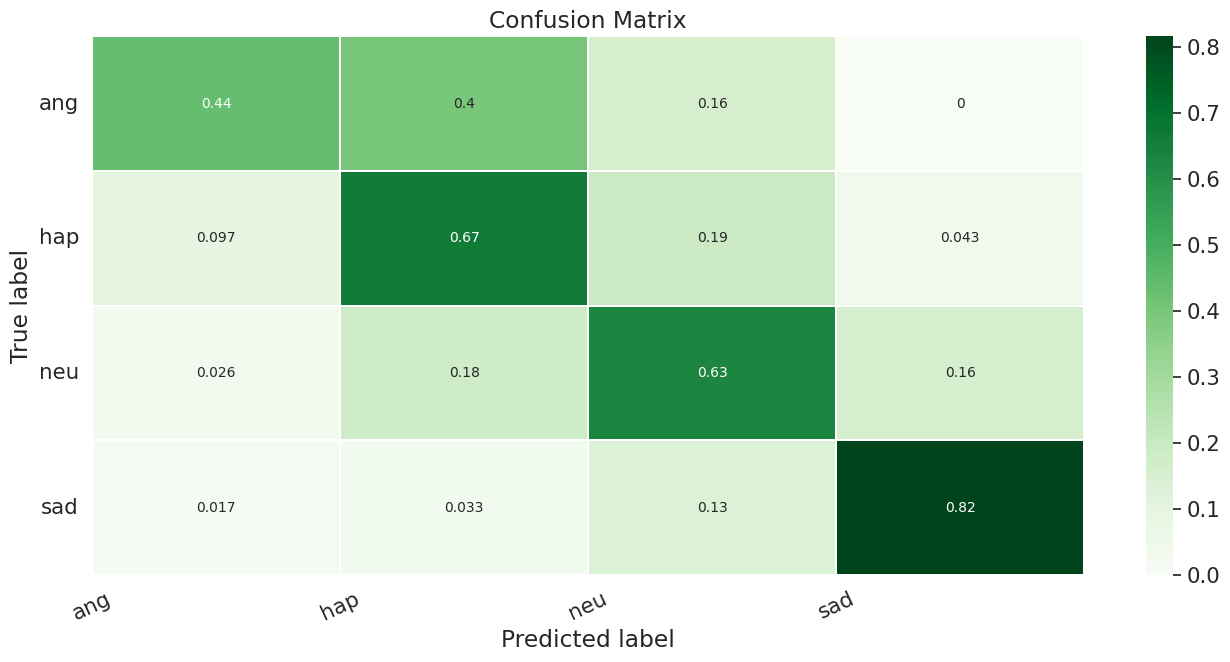

In [55]:
ploting_the_confusion_matrix(y_test, y_pred, emotions, unsupervised=False)

In [56]:
model.save('model3-66.keras')

In [ ]:
model1 = keras.models.load_model("model1-62.keras")

In [ ]:
history = model1.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=10)

Epoch 1/10
46/46 [==============================] - 16s 230ms/step - loss: 0.9254 - accuracy: 0.5990 - val_loss: 0.9452 - val_accuracy: 0.6093
Epoch 2/10
46/46 [==============================] - 8s 167ms/step - loss: 0.9215 - accuracy: 0.5956 - val_loss: 0.9704 - val_accuracy: 0.5874
Epoch 3/10
46/46 [==============================] - 8s 168ms/step - loss: 0.9136 - accuracy: 0.6141 - val_loss: 0.9277 - val_accuracy: 0.6066
Epoch 4/10
46/46 [==============================] - 7s 148ms/step - loss: 0.9072 - accuracy: 0.6004 - val_loss: 0.9144 - val_accuracy: 0.6202
Epoch 5/10
46/46 [==============================] - 8s 170ms/step - loss: 0.9062 - accuracy: 0.6113 - val_loss: 0.9914 - val_accuracy: 0.5519
Epoch 6/10
46/46 [==============================] - 7s 146ms/step - loss: 0.9231 - accuracy: 0.6018 - val_loss: 0.9180 - val_accuracy: 0.5929
Epoch 7/10
46/46 [==============================] - 8s 171ms/step - loss: 0.9017 - accuracy: 0.6120 - val_loss: 0.9456 - val_accuracy: 0.5956
Epoch

In [ ]:
test_loss, test_acc = model1.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: ",test_acc)

Test Accuracy:  0.6203007698059082


In [ ]:
from scipy.fftpack.realtransforms import dct
eps = 0.00000001

def stZCR(frame):
    """Computes zero crossing rate of frame"""
    count = len(frame)
    countZ = np.sum(np.abs(np.diff(np.sign(frame)))) / 2
    return (np.float64(countZ) / np.float64(count-1.0))


def stEnergy(frame):
    """Computes signal energy of frame"""
    return np.sum(frame ** 2) / np.float64(len(frame))


def stEnergyEntropy(frame, numOfShortBlocks=10):
    """Computes entropy of energy"""
    Eol = np.sum(frame ** 2)    # total frame energy
    L = len(frame)
    subWinLength = int(np.floor(L / numOfShortBlocks))
    if L != subWinLength * numOfShortBlocks:
            frame = frame[0:subWinLength * numOfShortBlocks]
    # subWindows is of size [numOfShortBlocks x L]
    subWindows = frame.reshape(subWinLength, numOfShortBlocks, order='F').copy()

    # Compute normalized sub-frame energies:
    s = np.sum(subWindows ** 2, axis=0) / (Eol + eps)

    # Compute entropy of the normalized sub-frame energies:
    Entropy = -np.sum(s * np.log2(s + eps))
    return Entropy


""" Frequency-domain audio features """


def stSpectralCentroidAndSpread(X, fs):
    """Computes spectral centroid of frame (given abs(FFT))"""
    ind = (np.arange(1, len(X) + 1)) * (fs/(2.0 * len(X)))

    Xt = X.copy()
    Xt = Xt / Xt.max()
    NUM = np.sum(ind * Xt)
    DEN = np.sum(Xt) + eps

    # Centroid:
    C = (NUM / DEN)

    # Spread:
    S = np.sqrt(np.sum(((ind - C) ** 2) * Xt) / DEN)

    # Normalize:
    C = C / (fs / 2.0)
    S = S / (fs / 2.0)

    return (C, S)


def stSpectralEntropy(X, numOfShortBlocks=10):
    """Computes the spectral entropy"""
    L = len(X)                         # number of frame samples
    Eol = np.sum(X ** 2)            # total spectral energy

    subWinLength = int(np.floor(L / numOfShortBlocks))   # length of sub-frame
    if L != subWinLength * numOfShortBlocks:
        X = X[0:subWinLength * numOfShortBlocks]

    subWindows = X.reshape(subWinLength, numOfShortBlocks, order='F').copy()  # define sub-frames (using matrix reshape)
    s = np.sum(subWindows ** 2, axis=0) / (Eol + eps)                      # compute spectral sub-energies
    En = -np.sum(s*np.log2(s + eps))                                    # compute spectral entropy

    return En


def stSpectralFlux(X, Xprev):
    """
    Computes the spectral flux feature of the current frame
    ARGUMENTS:
        X:        the abs(fft) of the current frame
        Xpre:        the abs(fft) of the previous frame
    """
    # compute the spectral flux as the sum of square distances:
    sumX = np.sum(X + eps)
    sumPrevX = np.sum(Xprev + eps)
    F = np.sum((X / sumX - Xprev/sumPrevX) ** 2)

    return F


def stSpectralRollOff(X, c, fs):
    """Computes spectral roll-off"""
    totalEnergy = np.sum(X ** 2)
    fftLength = len(X)
    Thres = c*totalEnergy
    # Ffind the spectral rolloff as the frequency position where the respective spectral energy is equal to c*totalEnergy
    CumSum = np.cumsum(X ** 2) + eps
    [a, ] = np.nonzero(CumSum > Thres)
    if len(a) > 0:
        mC = np.float64(a[0]) / (float(fftLength))
    else:
        mC = 0.0
    return (mC)

def stMFCC(X, fbank, nceps):
    """
    Computes the MFCCs of a frame, given the fft mag
    ARGUMENTS:
        X:        fft magnitude abs(FFT)
        fbank:    filter bank (see mfccInitFilterBanks)
    RETURN
        ceps:     MFCCs (13 element vector)
    Note:    MFCC calculation is, in general, taken from the scikits.talkbox library (MIT Licence),
    #    with a small number of modifications to make it more compact and suitable for the pyAudioAnalysis Lib
    """

    mspec = np.log10(np.dot(X, fbank.T)+eps)
    ceps = dct(mspec, type=2, norm='ortho', axis=-1)[:nceps]
    return ceps

def stChromaFeatures(X, fs, nChroma, nFreqsPerChroma):
    #TODO: 1 complexity
    #TODO: 2 bug with large windows

    chromaNames = ['A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#']
    spec = X**2
    C = np.zeros((nChroma.shape[0],))
    C[nChroma] = spec
    C /= nFreqsPerChroma[nChroma]
    finalC = np.zeros((12, 1))
    newD = int(np.ceil(C.shape[0] // 12.0) * 12)
    C2 = np.zeros((newD, ))
    #C2[0:C.shape[0]] = C
    C2 = C2.reshape(int(np.ceil(C2.shape[0]//12)), 12)
    #for i in range(12):
    #    finalC[i] = numpy.sum(C[i:C.shape[0]:12])
    finalC = np.matrix(np.sum(C2, axis=0)).T
    finalC /= spec.sum()
    return chromaNames, finalC

def mfccInitFilterBanks(fs, nfft):
    """
    Computes the triangular filterbank for MFCC computation (used in the stFeatureExtraction function before the stMFCC function call)
    This function is taken from the scikits.talkbox library (MIT Licence):
    https://pypi.python.org/pypi/scikits.talkbox
    """

    # filter bank params:
    lowfreq = 133.33
    linsc = 200/3.
    logsc = 1.0711703
    numLinFiltTotal = 13
    numLogFilt = 27

    if fs < 8000:
        nlogfil = 5

    # Total number of filters
    nFiltTotal = numLinFiltTotal + numLogFilt
    #print (str(nFiltTotal))
    #print (str(nfft))

    # Compute frequency points of the triangle:
    freqs = np.zeros(nFiltTotal+2)
    freqs[:numLinFiltTotal] = lowfreq + np.arange(numLinFiltTotal) * linsc
    freqs[numLinFiltTotal:] = freqs[numLinFiltTotal-1] * logsc ** np.arange(1, numLogFilt + 3)
    heights = 2./(freqs[2:] - freqs[0:-2])

    # Compute filterbank coeff (in fft domain, in bins)


    fbank = np.zeros((int(nFiltTotal), int(nfft)))
    nfreqs = np.arange(nfft) / (1. * nfft) * fs

    for i in range(nFiltTotal):
        lowTrFreq = freqs[i]
        cenTrFreq = freqs[i+1]
        highTrFreq = freqs[i+2]

        lid = np.arange(np.floor(lowTrFreq * nfft / fs) + 1, np.floor(cenTrFreq * nfft / fs) + 1, dtype=int)
        lslope = heights[i] / (cenTrFreq - lowTrFreq)
        rid = np.arange(np.floor(cenTrFreq * nfft / fs) + 1, np.floor(highTrFreq * nfft / fs) + 1, dtype=int)
        rslope = heights[i] / (highTrFreq - cenTrFreq)
        fbank[i][lid] = lslope * (nfreqs[lid] - lowTrFreq)
        fbank[i][rid] = rslope * (highTrFreq - nfreqs[rid])

    return fbank, freqs

def stChromaFeaturesInit(nfft, fs):
    """
    This function initializes the chroma matrices used in the calculation of the chroma features
    """
    freqs = np.array([((f + 1) * fs) / (2 * int(nfft)) for f in range(int(nfft))])
    Cp = 27.50

    nChroma = np.round(12.0 * np.log2(freqs / Cp)).astype(int)

    nFreqsPerChroma = np.zeros((nChroma.shape[0], ))

    uChroma = np.unique(nChroma)
    for u in uChroma:
        idx = np.nonzero(nChroma == u)
        nFreqsPerChroma[idx] = idx[0].shape
    return nChroma, nFreqsPerChroma

<ipython-input-25-de4c83cca729>:1: DeprecationWarning: Please use `dct` from the `scipy.fftpack` namespace, the `scipy.fftpack.realtransforms` namespace is deprecated.
  from scipy.fftpack.realtransforms import dct
